##LOW PASS FILTER


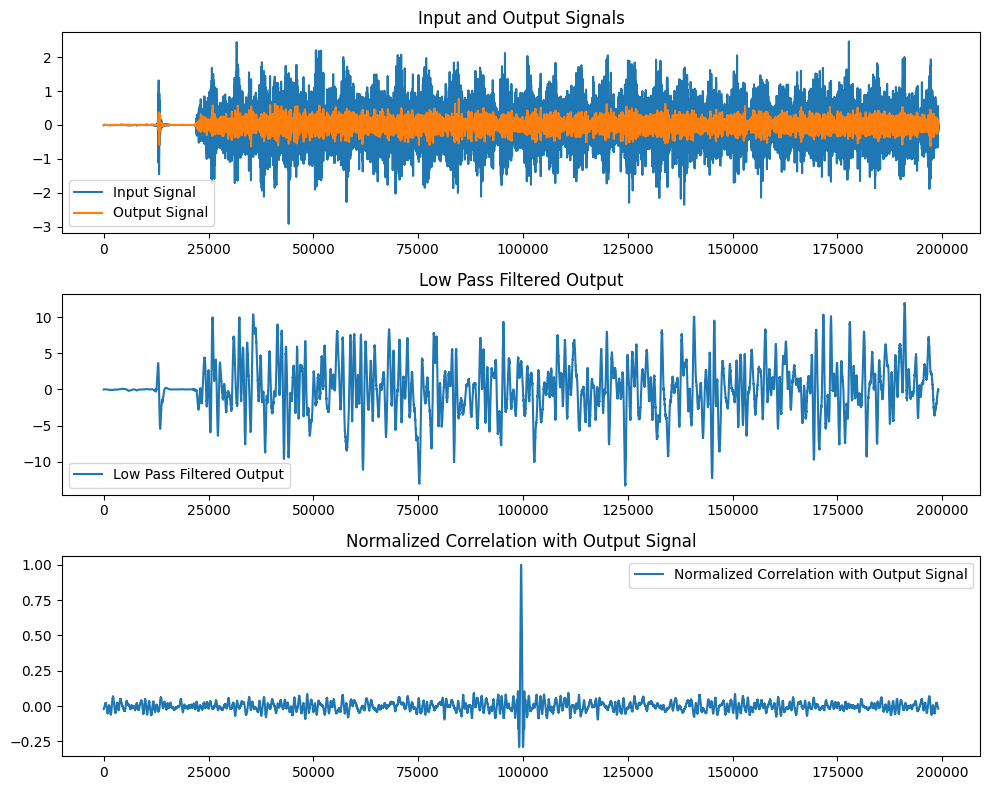

The inferred type of filtering is: Low Pass
Maximum Correlation Value: 8485.578423185812
Normalized Maximum Correlation Value: 1.0
Mean Normalized Correlation Value: 0.00038830115579160837


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from sklearn.preprocessing import normalize

# Step 1: Read input and output signals
x = np.loadtxt('INPUT-SIGNAL-X(t).txt')  # input signal contains x(t)
y = np.loadtxt('OUTPUT-SIGNAL-Y(t).txt')  # Output signal contains y(t)

# Step 2: Design Low Pass filter with different window functions
def design_low_pass_filter(cutoff_freq, sampling_freq, num_taps, window_func='blackman'):
    nyquist_freq = 0.5 * sampling_freq
    normalized_cutoff = cutoff_freq / nyquist_freq
    taps = np.sinc(2 * normalized_cutoff * (np.arange(num_taps) - (num_taps - 1) / 2))

    # Apply the selected windowing function
    if window_func == 'hamming':
        window = np.hamming(num_taps)
    elif window_func == 'hann':
        window = np.hanning(num_taps)
    elif window_func == 'blackman':
        window = np.blackman(num_taps)
    elif window_func == 'kaiser':
        # Example of using a Kaiser window with beta=6.0
        window = np.kaiser(num_taps, beta=6.0)
    else:
        raise ValueError("Invalid window function specified")

    taps = taps * window
    return taps

# Adjust filter parameters to achieve higher correlation
cutoff_frequency_lp = 50  # Adjust cutoff frequency as needed
sampling_frequency = 100000  # Adjust sampling frequency as needed
num_taps_lp = 1500  # Adjust number of taps as needed
window_function = 'hamming'  # Choose the desired window function

hlp = design_low_pass_filter(cutoff_frequency_lp, sampling_frequency, num_taps_lp, window_func=window_function)


# Step 3: Convolve Low Pass filter with input signal
ylp = np.convolve(x, hlp, mode='same')

# Step 4: Calculate correlation
corr_lp = correlate(y, ylp, mode='same')

# Normalize correlation
corr_lp_normalized = normalize(corr_lp.reshape(1, -1), norm='max').flatten()

# Function to display correlation values
def display_correlation_values(correlation, normalized_correlation):
    max_corr_index = np.argmax(correlation)
    max_corr_value = correlation[max_corr_index]
    normalized_max_corr_value = normalized_correlation[max_corr_index]
    mean_normalized_corr_value = np.mean(normalized_correlation)  # Calculate mean normalized correlation value
    print("Maximum Correlation Value:", max_corr_value)
    print("Normalized Maximum Correlation Value:", normalized_max_corr_value)
    print("Mean Normalized Correlation Value:", mean_normalized_corr_value)

# Step 5: Plotting
plt.figure(figsize=(10, 8))

# Plot Input and Output Signals
plt.subplot(3, 1, 1)
plt.plot(x, label='Input Signal')
plt.plot(y, label='Output Signal')
plt.title('Input and Output Signals')
plt.legend()

# Plot Low Pass Filtered Output
plt.subplot(3, 1, 2)
plt.plot(ylp, label='Low Pass Filtered Output')
plt.title('Low Pass Filtered Output')
plt.legend()

# Plot Normalized Correlation
plt.subplot(3, 1, 3)
plt.plot(corr_lp_normalized, label='Normalized Correlation with Output Signal')
plt.title('Normalized Correlation with Output Signal')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Determine the best matching filter
best_filter = 'Low Pass'  # Since this is the only filter we have implemented

print("The inferred type of filtering is:", best_filter)

# Display correlation values
display_correlation_values(corr_lp, corr_lp_normalized)


## HIGH PASS FILTER


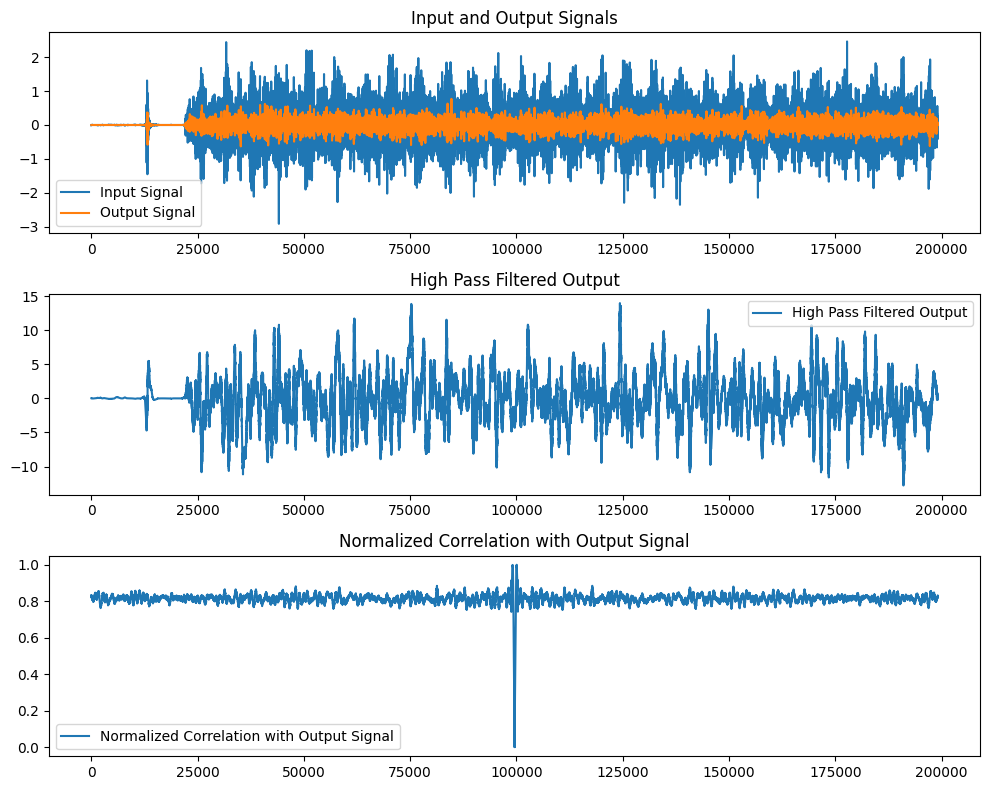

The inferred type of filtering is: High Pass
Maximum Correlation Value: 2490.7472946874486
Normalized Maximum Correlation Value: 1.0
Mean Normalized Correlation Value: 0.8145554021407497


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Step 1: Read input and output signals
x = np.loadtxt('INPUT-SIGNAL-X(t).txt')  # Assuming input_signal.txt contains x(t)
y = np.loadtxt('OUTPUT-SIGNAL-Y(t).txt')  # Assuming output_signal.txt contains y(t)

# Step 2: Design High Pass filter
def design_high_pass_filter(cutoff_freq, sampling_freq, num_taps):
    nyquist_freq = 0.5 * sampling_freq
    normalized_cutoff = cutoff_freq / nyquist_freq
    taps = np.sinc(2 * normalized_cutoff * (np.arange(num_taps) - (num_taps - 1) / 2))
    window = np.hamming(num_taps)
    taps = taps * window
    # Invert the filter coefficients to create a high-pass filter
    taps = -taps
    # Shift the filter to make it causal
    taps[num_taps // 2] += 1
    return taps

# Adjust filter parameters
cutoff_frequency_hp = 50  # Adjust cutoff frequency as needed
sampling_frequency = 100000  # Adjust sampling frequency as needed
num_taps_hp = 1500  # Adjust number of taps as needed
hhp = design_high_pass_filter(cutoff_frequency_hp, sampling_frequency, num_taps_hp)

# Step 3: Convolve High Pass filter with input signal
yhp = np.convolve(x, hhp, mode='same')

# Step 4: Calculate correlation
corr_hp = correlate(y, yhp, mode='same')

# Normalize correlation to range from 0 to 1
corr_hp_normalized = (corr_hp - np.min(corr_hp)) / (np.max(corr_hp) - np.min(corr_hp))

# Function to display correlation values
def display_correlation_values(correlation, normalized_correlation):
    max_corr_index = np.argmax(correlation)
    max_corr_value = correlation[max_corr_index]
    normalized_max_corr_value = normalized_correlation[max_corr_index]
    mean_normalized_corr_value = np.mean(normalized_correlation)  # Calculate mean normalized correlation value
    print("Maximum Correlation Value:", max_corr_value)
    print("Normalized Maximum Correlation Value:", normalized_max_corr_value)
    print("Mean Normalized Correlation Value:", mean_normalized_corr_value)


# Step 5: Plotting
plt.figure(figsize=(10, 8))

# Plot Input and Output Signals
plt.subplot(3, 1, 1)
plt.plot(x, label='Input Signal')
plt.plot(y, label='Output Signal')
plt.title('Input and Output Signals')
plt.legend()

# Plot High Pass Filtered Output
plt.subplot(3, 1, 2)
plt.plot(yhp, label='High Pass Filtered Output')
plt.title('High Pass Filtered Output')
plt.legend()

# Plot Normalized Correlation
plt.subplot(3, 1, 3)
plt.plot(corr_hp_normalized, label='Normalized Correlation with Output Signal')
plt.title('Normalized Correlation with Output Signal')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Determine the best matching filter
best_filter = 'High Pass'  # Since this is the only filter we have implemented

print("The inferred type of filtering is:", best_filter)

# Display correlation values
display_correlation_values(corr_hp, corr_hp_normalized)


## BAND PASS FILTER

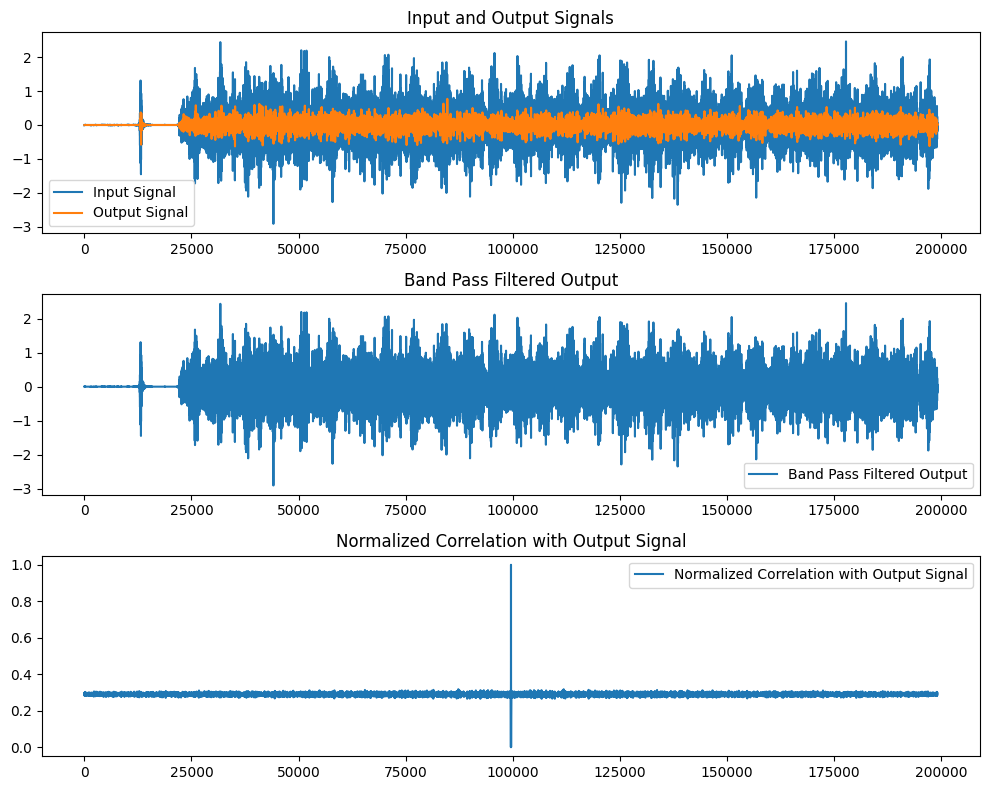

The inferred type of filtering is: Band Pass
Maximum Correlation Value: 6273.9542
Mean Correlation Value: 0.006339824280267406


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Step 1: Read input and output signals
x = np.loadtxt('INPUT-SIGNAL-X(t).txt')  # Assuming input_signal.txt contains x(t)
y = np.loadtxt('OUTPUT-SIGNAL-Y(t).txt')  # Assuming output_signal.txt contains y(t)

# Step 2: Design Band Pass filter
def design_band_pass_filter(center_freq, bandwidth, sampling_freq, num_taps):
    nyquist_freq = 0.5 * sampling_freq
    normalized_center_freq = center_freq / nyquist_freq
    normalized_bandwidth = bandwidth / nyquist_freq

    # Design low-pass filter
    hlp = np.sinc(2 * normalized_center_freq * (np.arange(num_taps) - (num_taps - 1) / 2))
    window = np.hamming(num_taps)  # Using Hamming window
    hlp = hlp * window

    # Design high-pass filter
    hhp = -hlp
    hhp[num_taps // 2] += 1

    # Combine low-pass and high-pass filters to create band-pass filter
    hbp = hlp + hhp
    return hbp

# Adjust filter parameters
center_frequency_bp = 2500  # Adjust center frequency as needed
bandwidth_bp = 1000  # Adjust bandwidth as needed
num_taps_bp = 1500  # Increase number of taps
sampling_frequency = 100000  # Adjust sampling frequency as needed

# Design band-pass filter
hbp = design_band_pass_filter(center_frequency_bp, bandwidth_bp, sampling_frequency, num_taps_bp)

# Step 3: Convolve Band Pass filter with input signal
ybp = np.convolve(x, hbp, mode='same')

# Step 4: Calculate correlation
corr_bp = correlate(y, ybp, mode='same')

# Normalize correlation to range from 0 to 1
corr_bp_normalized = (corr_bp - np.min(corr_bp)) / (np.max(corr_bp) - np.min(corr_bp))

# Function to display correlation value
def display_correlation_value(correlation):
    max_corr_index = np.argmax(correlation)
    max_corr_value = correlation[max_corr_index]
    print("Maximum Correlation Value:", max_corr_value)
    mean_corr_value = np.mean(correlation)
    print("Mean Correlation Value:", mean_corr_value)

# Step 5: Plotting
plt.figure(figsize=(10, 8))

# Plot Input and Output Signals
plt.subplot(3, 1, 1)
plt.plot(x, label='Input Signal')
plt.plot(y, label='Output Signal')
plt.title('Input and Output Signals')
plt.legend()

# Plot Band Pass Filtered Output
plt.subplot(3, 1, 2)
plt.plot(ybp, label='Band Pass Filtered Output')
plt.title('Band Pass Filtered Output')
plt.legend()

# Plot Normalized Correlation
plt.subplot(3, 1, 3)
plt.plot(corr_bp_normalized, label='Normalized Correlation with Output Signal')
plt.title('Normalized Correlation with Output Signal')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Determine the best matching filter
best_filter = 'Band Pass'  # Since this is the only filter we have implemented

print("The inferred type of filtering is:", best_filter)

# Display correlation value
display_correlation_value(corr_bp)
